In [1]:
# Import libraries
import numpy as np
import pandas as pd

Source for df1 from IEEE DataPort: https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive

In [2]:
#Load data
df1=pd.read_csv("dataset/IEEE Dataset Heart Disease.csv")
df1.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


Source for df2 from UC Irvine Machine Learning Repository:
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data

In [3]:
df2=pd.read_csv("dataset/UCI Dataset Heart Disease.csv")
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Scrub – Data Cleaning

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Description of df2's columns
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [6]:
#Drop unwanted column
df2.drop(columns=['ca','thal'], inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  target    1025 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 96.2 KB


In [7]:
# Rename the columns of df2
column_mapping = {
    'cp': 'chest pain type',
    'trestbps': 'resting bp s',
    'chol': 'cholesterol',
    'fbs': 'fasting blood sugar',
    'restecg': 'resting ecg',
    'thalach': 'max heart rate',
    'exang': 'exercise angina',
    'slope': 'ST slope'
}

# Rename the columns of df2
df2.rename(columns=column_mapping, inplace=True)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1025 non-null   int64  
 1   sex                  1025 non-null   int64  
 2   chest pain type      1025 non-null   int64  
 3   resting bp s         1025 non-null   int64  
 4   cholesterol          1025 non-null   int64  
 5   fasting blood sugar  1025 non-null   int64  
 6   resting ecg          1025 non-null   int64  
 7   max heart rate       1025 non-null   int64  
 8   exercise angina      1025 non-null   int64  
 9   oldpeak              1025 non-null   float64
 10  ST slope             1025 non-null   int64  
 11  target               1025 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 96.2 KB


In [8]:
df1['age'].value_counts()

54    67
58    58
57    50
52    47
55    47
59    47
56    47
51    47
62    46
60    44
53    40
48    38
61    38
63    37
41    33
50    32
64    31
43    31
46    31
44    29
65    29
49    27
42    26
45    25
67    23
47    23
66    19
39    18
38    17
69    16
40    16
35    14
37    13
68    13
70    11
34     9
74     8
71     8
36     6
32     5
72     4
29     4
77     3
75     3
76     3
33     2
31     2
30     1
28     1
73     1
Name: age, dtype: int64

In [9]:
df2['age'].value_counts()

58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
41    32
63    32
67    31
61    31
55    30
65    27
43    26
42    26
53    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
39    14
70    14
68    12
38    12
71    11
40    11
69     9
37     6
34     6
29     4
76     3
77     3
74     3
Name: age, dtype: int64

In [10]:
df1['sex'].value_counts()

1    909
0    281
Name: sex, dtype: int64

In [11]:
df2['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [12]:
df1['chest pain type'].value_counts()

4    625
3    283
2    216
1     66
Name: chest pain type, dtype: int64

In [13]:
df2['chest pain type'].value_counts()

0    497
2    284
1    167
3     77
Name: chest pain type, dtype: int64

In [14]:
# Replace values in the 'chest pain type' column
df2['chest pain type'] = df2['chest pain type'].replace({0: 1, 1: 2, 2: 3, 3: 4})

df2['chest pain type'].value_counts()

1    497
3    284
2    167
4     77
Name: chest pain type, dtype: int64

In [15]:
df1['cholesterol'].value_counts()

0      172
254     16
234     13
211     13
204     13
      ... 
385      1
466      1
129      1
338      1
131      1
Name: cholesterol, Length: 222, dtype: int64

In [16]:
# Clear rows where 'cholesterol' column is equal to 0
df1 = df1[df1['cholesterol'] != 0]

In [17]:
df1['cholesterol'].value_counts()

254    16
211    13
234    13
204    13
230    12
       ..
384     1
458     1
328     1
316     1
131     1
Name: cholesterol, Length: 221, dtype: int64

In [18]:
df2['cholesterol'].value_counts()

204    21
234    21
197    19
212    18
254    17
       ..
164     3
394     3
215     3
160     3
141     3
Name: cholesterol, Length: 152, dtype: int64

In [19]:
df1['resting ecg'].value_counts()

0    577
2    313
1    128
Name: resting ecg, dtype: int64

In [20]:
df2['resting ecg'].value_counts()

1    513
0    497
2     15
Name: resting ecg, dtype: int64

In [21]:
df1['exercise angina'].value_counts()

0    641
1    377
Name: exercise angina, dtype: int64

In [22]:
df2['exercise angina'].value_counts()

0    680
1    345
Name: exercise angina, dtype: int64

In [23]:
df1['ST slope'].value_counts()

1    480
2    476
3     61
0      1
Name: ST slope, dtype: int64

In [24]:
df2['ST slope'].value_counts()

1    482
2    469
0     74
Name: ST slope, dtype: int64

In [25]:
df1['target'].value_counts()

0    541
1    477
Name: target, dtype: int64

In [26]:
df2['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [27]:
#Combine two dataframe
combined_df = pd.concat([df1, df2], ignore_index=True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2043 non-null   int64  
 1   sex                  2043 non-null   int64  
 2   chest pain type      2043 non-null   int64  
 3   resting bp s         2043 non-null   int64  
 4   cholesterol          2043 non-null   int64  
 5   fasting blood sugar  2043 non-null   int64  
 6   resting ecg          2043 non-null   int64  
 7   max heart rate       2043 non-null   int64  
 8   exercise angina      2043 non-null   int64  
 9   oldpeak              2043 non-null   float64
 10  ST slope             2043 non-null   int64  
 11  target               2043 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 191.7 KB


- Sex (1 = male, 0= female)
- Chest Pain Type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
- Fasting Blood Sugar ((fasting blood sugar > 120 mg/dl) (1 = true; 0 = false))
- Resting electrocardiogram results (0 = normal, 1 = having ST-T wave abnormality (T wave inversions
and/or ST elevation or depression of > 0.05 mV), 2 = showing probable or definite left ventricular
hypertrophy by Estes' criteria)
- Exercise induced angina (1 = yes; 0 = no)
- The slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)
- target (1 = heart disease, 0 = Normal)

In [28]:
#Check null value
combined_df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

No null value

In [29]:
#Check duplicates
print("Duplicate rows: ")
combined_df.duplicated().sum()

Duplicate rows: 


995

In [30]:
df = combined_df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048 entries, 0 to 1896
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1048 non-null   int64  
 1   sex                  1048 non-null   int64  
 2   chest pain type      1048 non-null   int64  
 3   resting bp s         1048 non-null   int64  
 4   cholesterol          1048 non-null   int64  
 5   fasting blood sugar  1048 non-null   int64  
 6   resting ecg          1048 non-null   int64  
 7   max heart rate       1048 non-null   int64  
 8   exercise angina      1048 non-null   int64  
 9   oldpeak              1048 non-null   float64
 10  ST slope             1048 non-null   int64  
 11  target               1048 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 106.4 KB


Drop outliers

In [31]:
from scipy import stats

def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    outliers = np.where(z_scores > threshold)
    return outliers[0]

# Detect outliers in numerical columns
numerical_columns = df.select_dtypes(include=np.number).columns
outliers_indices = detect_outliers_zscore(df[numerical_columns])

# Drop rows containing outliers
df = df.drop(df.index[outliers_indices])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1896
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1023 non-null   int64  
 1   sex                  1023 non-null   int64  
 2   chest pain type      1023 non-null   int64  
 3   resting bp s         1023 non-null   int64  
 4   cholesterol          1023 non-null   int64  
 5   fasting blood sugar  1023 non-null   int64  
 6   resting ecg          1023 non-null   int64  
 7   max heart rate       1023 non-null   int64  
 8   exercise angina      1023 non-null   int64  
 9   oldpeak              1023 non-null   float64
 10  ST slope             1023 non-null   int64  
 11  target               1023 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 103.9 KB


In [32]:
# Define the age groups
bins = [20, 40, 50, 60, 70, 1000]
labels = ['0', '1', '2', '3', '4']

# Add a new column to df indicating the age group
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

df['age_group'].value_counts()


2    414
1    261
3    230
0     83
4     35
Name: age_group, dtype: int64

Age groups
0 = '<40', 1 = '40-49', 2 = '50-59', 3 = '60-69', 4 = '>=70'

In [33]:
# Define the bins for 'resting bp s' with non-uniform intervals
bins = [0, 110, 120, 130, 140, 160, 1000]
labels = ['0', '1', '2', '3', '4', '5']

# Add a new column to df indicating the resting bp s group
df['resting_bp_group'] = pd.cut(df['resting bp s'], bins=bins, labels=labels, right=False)

df['resting_bp_group'].value_counts()


4    266
3    250
2    248
1    114
5     90
0     55
Name: resting_bp_group, dtype: int64

resting bp s group
0 = '<110', 1 = '110-119', 2 = '120-129', 3 = '130-139', 4 = '140-159', 5 = '>=160'

In [34]:
# Define the bins for 'cholesterol' with non-uniform intervals
bins = [0, 150, 200, 250, 300, 350, 1000]
labels = ['0', '1', '2', '3', '4', '5'] 

# Add a new column to df indicating the cholesterol group
df['cholesterol_group'] = pd.cut(df['cholesterol'], bins=bins, labels=labels, right=False)

df['cholesterol_group'].value_counts()

2    410
3    285
1    167
4    112
0     25
5     24
Name: cholesterol_group, dtype: int64

cholesterol_group 
0 ='<150', 1 ='150-199', 2 = '200-249', 3 = '250-299', 4 = '300-349', 5 = '>=350'

In [35]:
# Define the bins for 'max heart rate' with non-uniform intervals
bins = [0, 100, 120, 140, 160, 180, 1000]
labels = ['0', '1', '2', '3','4', '5'] 

# Add a new column to df indicating the max heart rate group
df['max heart rate_group'] = pd.cut(df['max heart rate'], bins=bins, labels=labels, right=False)

df['max heart rate_group'].value_counts()


3    303
4    252
2    232
1    134
5     53
0     49
Name: max heart rate_group, dtype: int64

max heart rate_group 
0 = '<100', 1 = '100-119', 2 = '120-139', 3 = '140-159', 4 = '160-179', 5 = '>=180'

In [36]:
# Define the bins for 'oldpeak' with custom intervals
bins = [-0.2, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4.5]  
labels = ['0', '1', '2', '3', '4', '5', '6', '7']  

# Add a new column to df indicating the oldpeak group
df['oldpeak_group'] = pd.cut(df['oldpeak'], bins=bins, labels=labels, right=False)

df['oldpeak_group'].value_counts()

0    488
2    158
3    108
4     85
1     79
6     40
5     39
7     26
Name: oldpeak_group, dtype: int64

oldpeak group
0 = '<0.5', 1 = '0.5-1', 2 = '1-1.5', 3 = '1.5-2', 4 = '2-2.5', 5 = '2.5-3', 6 = '3-3.5', 7 = '>=3.5'

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1896
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   age                   1023 non-null   int64   
 1   sex                   1023 non-null   int64   
 2   chest pain type       1023 non-null   int64   
 3   resting bp s          1023 non-null   int64   
 4   cholesterol           1023 non-null   int64   
 5   fasting blood sugar   1023 non-null   int64   
 6   resting ecg           1023 non-null   int64   
 7   max heart rate        1023 non-null   int64   
 8   exercise angina       1023 non-null   int64   
 9   oldpeak               1023 non-null   float64 
 10  ST slope              1023 non-null   int64   
 11  target                1023 non-null   int64   
 12  age_group             1023 non-null   category
 13  resting_bp_group      1023 non-null   category
 14  cholesterol_group     1023 non-null   category
 15  max 

In [38]:
# Convert categorical columns to integers
df['age_group'] = df['age_group'].cat.codes
df['resting_bp_group'] = df['resting_bp_group'].cat.codes
df['cholesterol_group'] = df['cholesterol_group'].cat.codes
df['max heart rate_group'] = df['max heart rate_group'].cat.codes
df['oldpeak_group'] = df['oldpeak_group'].cat.codes

In [39]:
df.head(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,age_group,resting_bp_group,cholesterol_group,max heart rate_group,oldpeak_group
0,40,1,2,140,289,0,0,172,0,0.0,1,0,1,4,3,4,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1,1,5,1,3,2
2,37,1,2,130,283,0,1,98,0,0.0,1,0,0,3,3,0,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1,1,3,2,1,3
4,54,1,3,150,195,0,0,122,0,0.0,1,0,2,4,1,2,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0,0,2,4,4,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0,1,3,2,4,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0,2,1,2,3,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1,0,4,2,2,3
9,48,0,2,120,284,0,0,120,0,0.0,1,0,1,2,3,2,0


In [40]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,age_group,resting_bp_group,cholesterol_group,max heart rate_group,oldpeak_group
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,53.287390,0.737048,2.813294,132.203324,242.374389,0.158358,0.605083,143.001955,0.368524,0.909482,1.527859,0.493646,1.875855,2.809384,2.355816,2.717498,1.638319
std,9.414852,0.440452,1.117964,16.680657,50.633730,0.365255,0.760094,24.393143,0.482640,1.037288,0.597578,0.500204,0.962727,1.322628,1.031065,1.247838,1.974935
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,71.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,2.000000,120.000000,208.000000,0.000000,0.000000,125.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,237.000000,0.000000,0.000000,144.000000,0.000000,0.600000,2.000000,0.000000,2.000000,3.000000,2.000000,3.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,274.000000,0.000000,1.000000,162.000000,1.000000,1.500000,2.000000,1.000000,3.000000,4.000000,3.000000,4.000000,3.000000
max,77.000000,1.000000,4.000000,180.000000,412.000000,1.000000,2.000000,202.000000,1.000000,4.200000,3.000000,1.000000,4.000000,5.000000,5.000000,5.000000,7.000000


Explore – Data Analysis

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

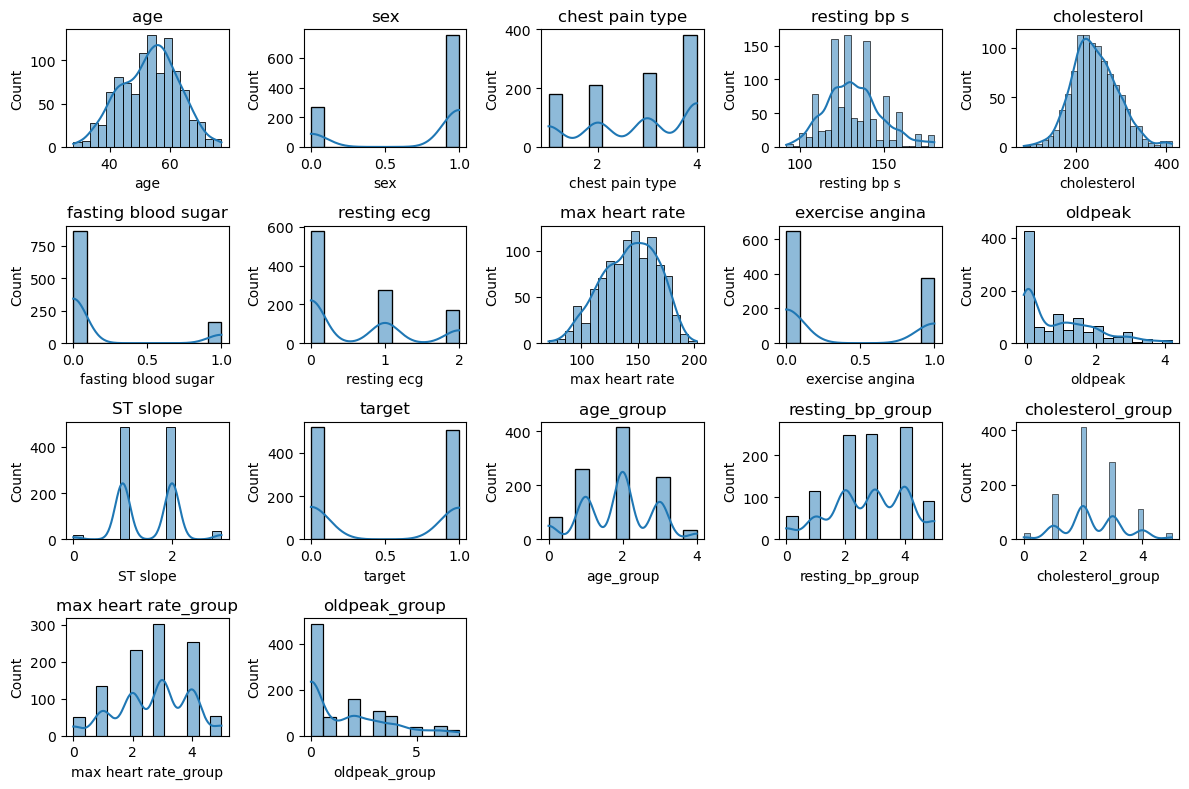

In [43]:
# Plot the distribution of each column
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns):
    plt.subplot(4, 5, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

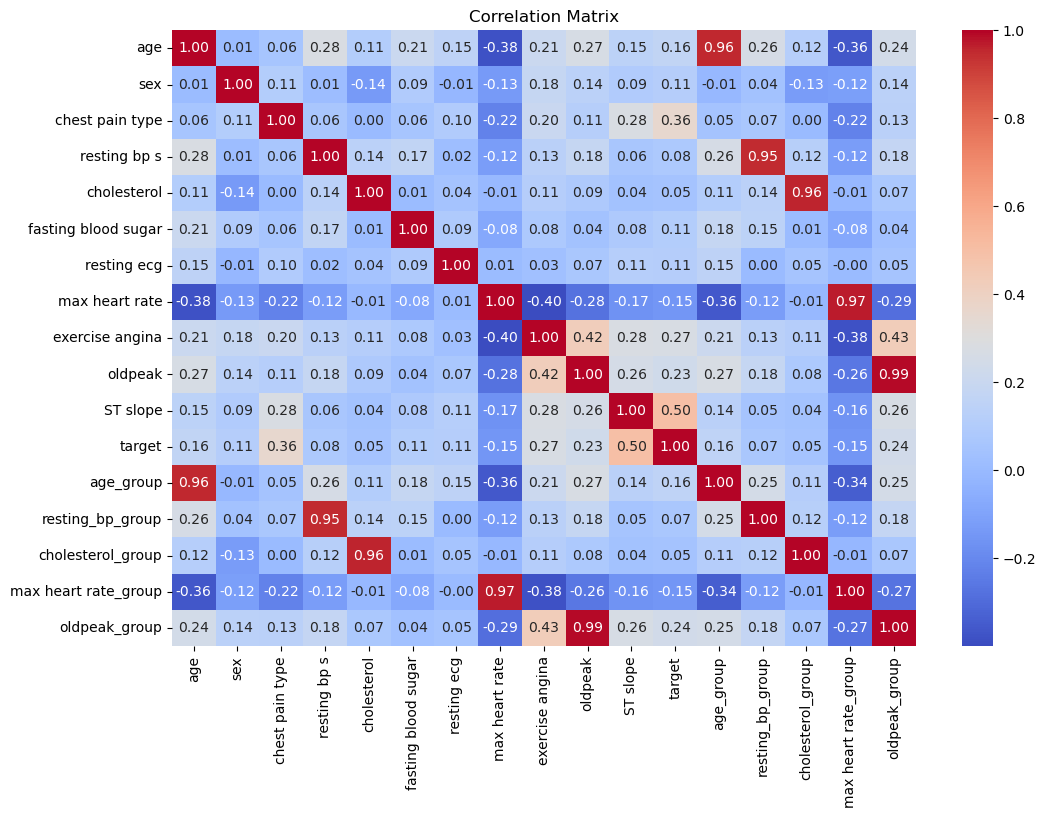

In [44]:
# Plot the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Moderate positive correlation
1. chest pain type - target
2. exercise angina - oldpeak grp
3. ST slope - target

Moderate negative correlation
1. max heart rate grp - age grp
2. max heart rate grp - exercise angina

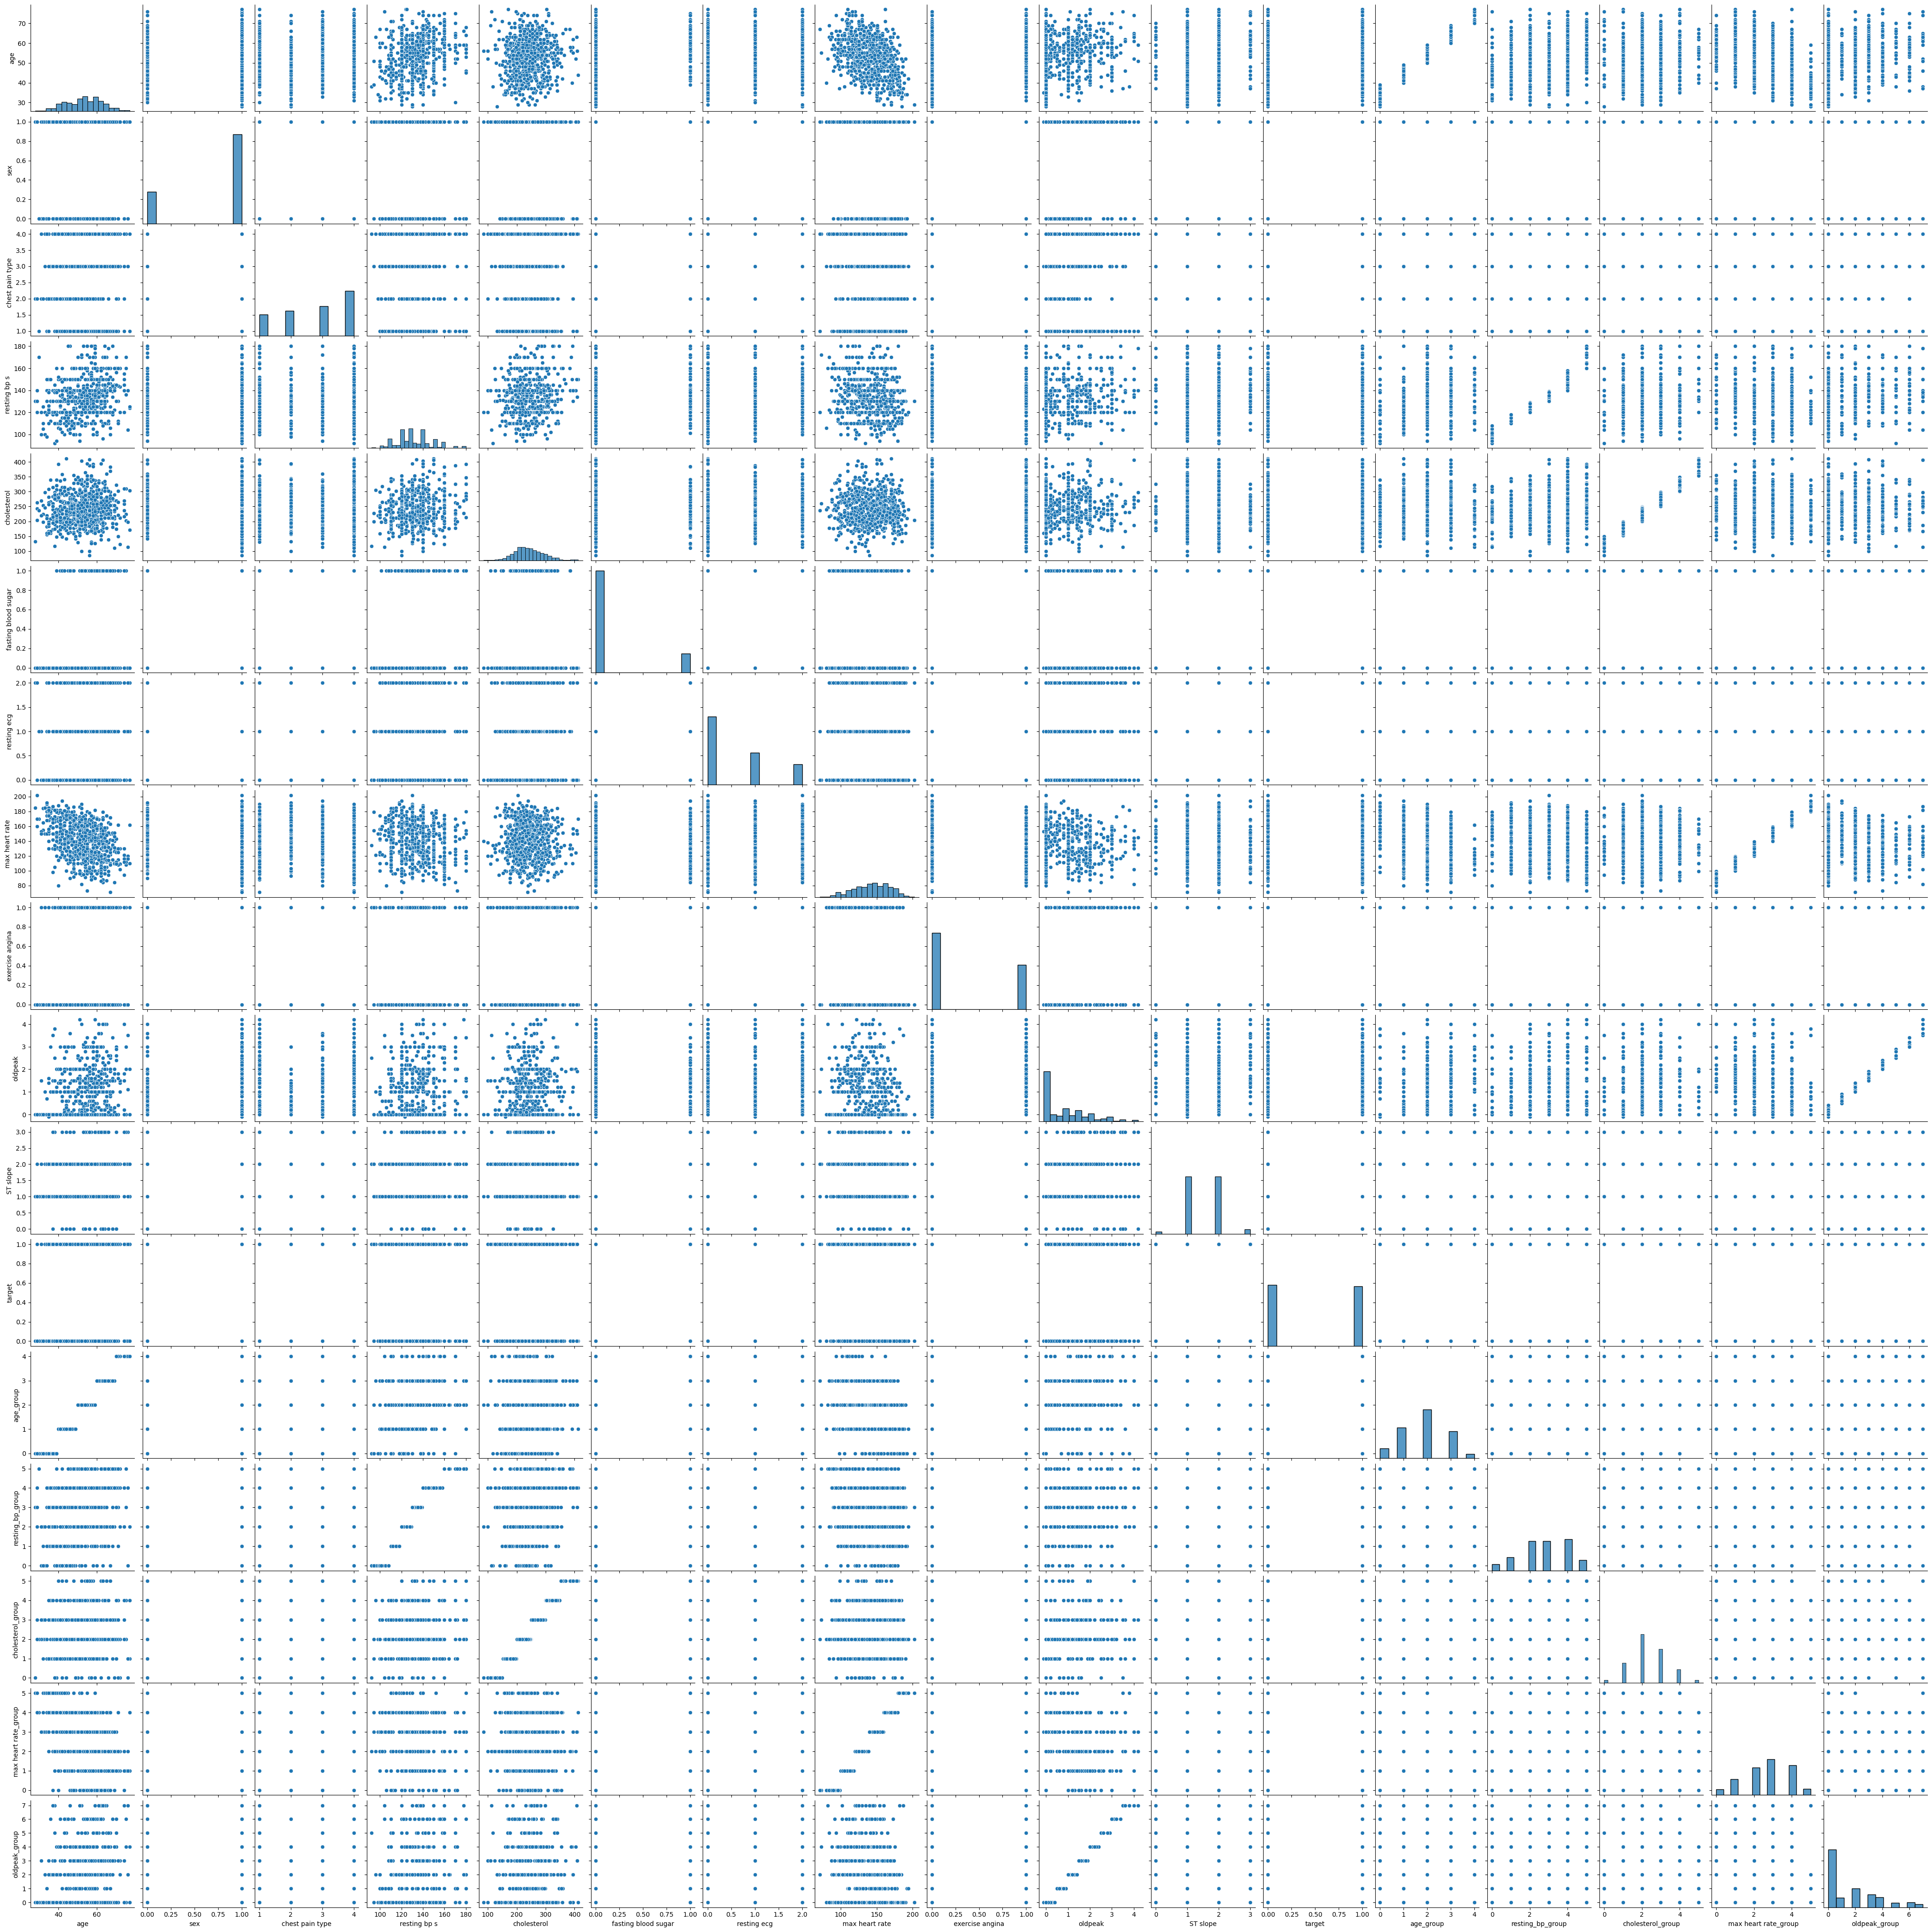

In [45]:
# Plot scatter and density plots
sns.pairplot(df)
plt.show()

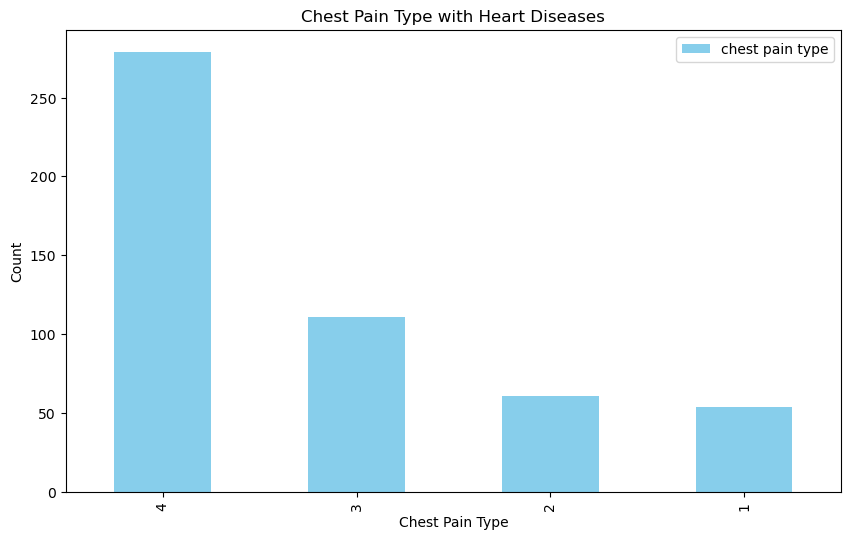

In [46]:
# Filter the DataFrame where target is equal to 1
target_1_df = df[df['target'] == 1]

# Count the occurrences of each age in the filtered DataFrame
cpt = target_1_df['chest pain type'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
cpt.plot(kind='bar', color='skyblue')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Chest Pain Type with Heart Diseases')
plt.legend()
plt.show()


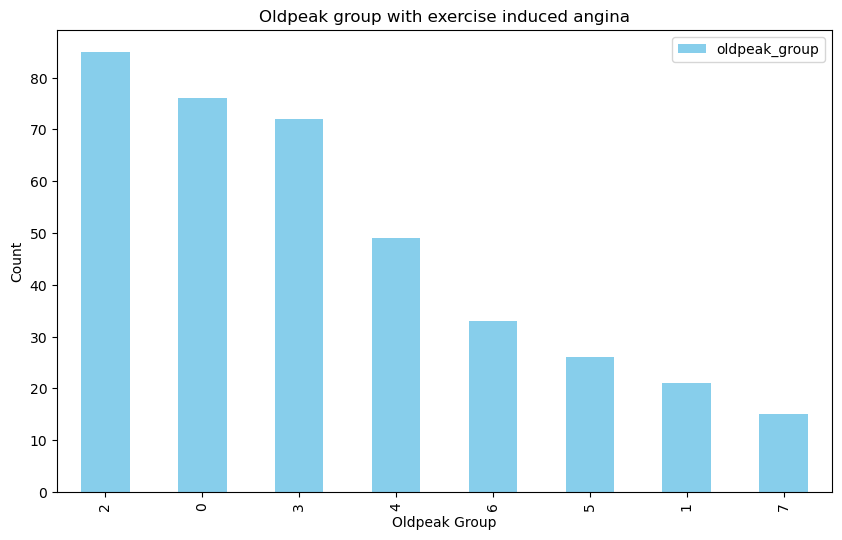

In [47]:
# Filter the DataFrame where exercise angina is equal to 1
target_1_df = df[df['exercise angina'] == 1]

# Count the occurrences of each oldpeak in the filtered DataFrame
age_counts = target_1_df['oldpeak_group'].value_counts()

# Find the age with the highest count of exercise angina equal to 1
most_common_age = age_counts.idxmax()

# Plot the bar chart
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Oldpeak Group')
plt.ylabel('Count')
plt.title('Oldpeak group with exercise induced angina')
plt.legend()
plt.show()


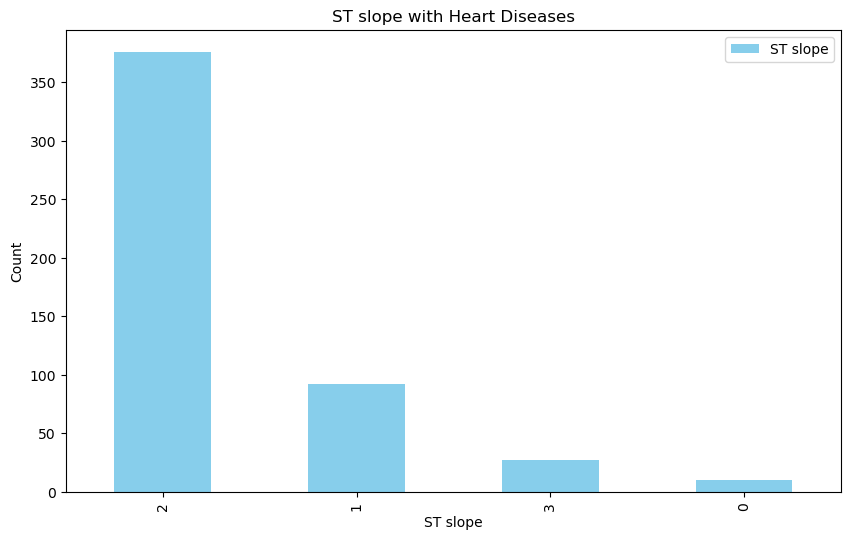

In [48]:
# Filter the DataFrame where target is equal to 1
target_1_df = df[df['target'] == 1]

# Count the occurrences of each ST slope in the filtered DataFrame
cpt = target_1_df['ST slope'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
cpt.plot(kind='bar', color='skyblue')
plt.xlabel('ST slope')
plt.ylabel('Count')
plt.title('ST slope with Heart Diseases')
plt.legend()
plt.show()